In [1]:
%cd ..

/Users/jason/repos/diffusion-motion-inbetweening


In [2]:
from pathlib import Path

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
dataset_folder = Path("dataset/HumanML3D/new_joints_abs_3d")

root_positions = []

for npy_file in tqdm(list(dataset_folder.glob("*.npy"))):
    data = np.load(npy_file)
    if data.shape[1:] != (22, 3):
        print(f"Skipping unexpected shape: {data.shape} in file: {npy_file}")
        continue

    root_data = data[:, 0, :]
    nan_count = np.sum(np.isnan(root_data))
    if nan_count > 0:
        print(f"Skipping file with {nan_count} nans: {npy_file}")
        continue

    root_positions.append(data[:, 0, :])

 20%|█▉        | 5815/29228 [00:01<00:04, 4842.07it/s]

Skipping unexpected shape: (22, 3) in file: dataset/HumanML3D/new_joints_abs_3d/M005836.npy


 28%|██▊       | 8322/29228 [00:01<00:04, 5020.05it/s]

Skipping unexpected shape: (22, 3) in file: dataset/HumanML3D/new_joints_abs_3d/000990.npy


 46%|████▌     | 13495/29228 [00:02<00:03, 5183.56it/s]

Skipping file with 250 nans: dataset/HumanML3D/new_joints_abs_3d/007975.npy


 53%|█████▎    | 15507/29228 [00:03<00:02, 4697.57it/s]

Skipping unexpected shape: (22, 3) in file: dataset/HumanML3D/new_joints_abs_3d/005836.npy


 78%|███████▊  | 22696/29228 [00:04<00:01, 5017.24it/s]

Skipping file with 250 nans: dataset/HumanML3D/new_joints_abs_3d/M007975.npy


 95%|█████████▌| 27815/29228 [00:05<00:00, 5037.06it/s]

Skipping unexpected shape: (22, 3) in file: dataset/HumanML3D/new_joints_abs_3d/M000990.npy


100%|██████████| 29228/29228 [00:05<00:00, 4967.69it/s]


In [4]:
root_positions_np = np.concatenate(root_positions, axis=0)
root_positions_np.shape

(4117220, 3)

In [5]:
# Get basic statistics (mean, std, min, max, percentiles)
print("=== Basic statistics ===")
np.set_printoptions(suppress=True, precision=4)
print("Mean:", np.mean(root_positions_np, axis=0))
print("Std: ", np.std(root_positions_np, axis=0))
print("Min: ", np.min(root_positions_np, axis=0))
print("Max: ", np.max(root_positions_np, axis=0))
print("10th percentile: ", np.percentile(root_positions_np, 10, axis=0))
print("50th percentile: ", np.percentile(root_positions_np, 50, axis=0))
print("90th percentile: ", np.percentile(root_positions_np, 90, axis=0))


=== Basic statistics ===
Mean: [0.0004 0.9386 0.3145]
Std:  [0.5254 0.1538 0.9257]
Min:  [-7.3567  0.0277 -9.9032]
Max:  [ 7.3214  2.0914 10.2565]
10th percentile:  [-0.2769  0.7838 -0.1514]
50th percentile:  [0.     0.9452 0.0134]
90th percentile:  [0.278  0.9773 1.4526]


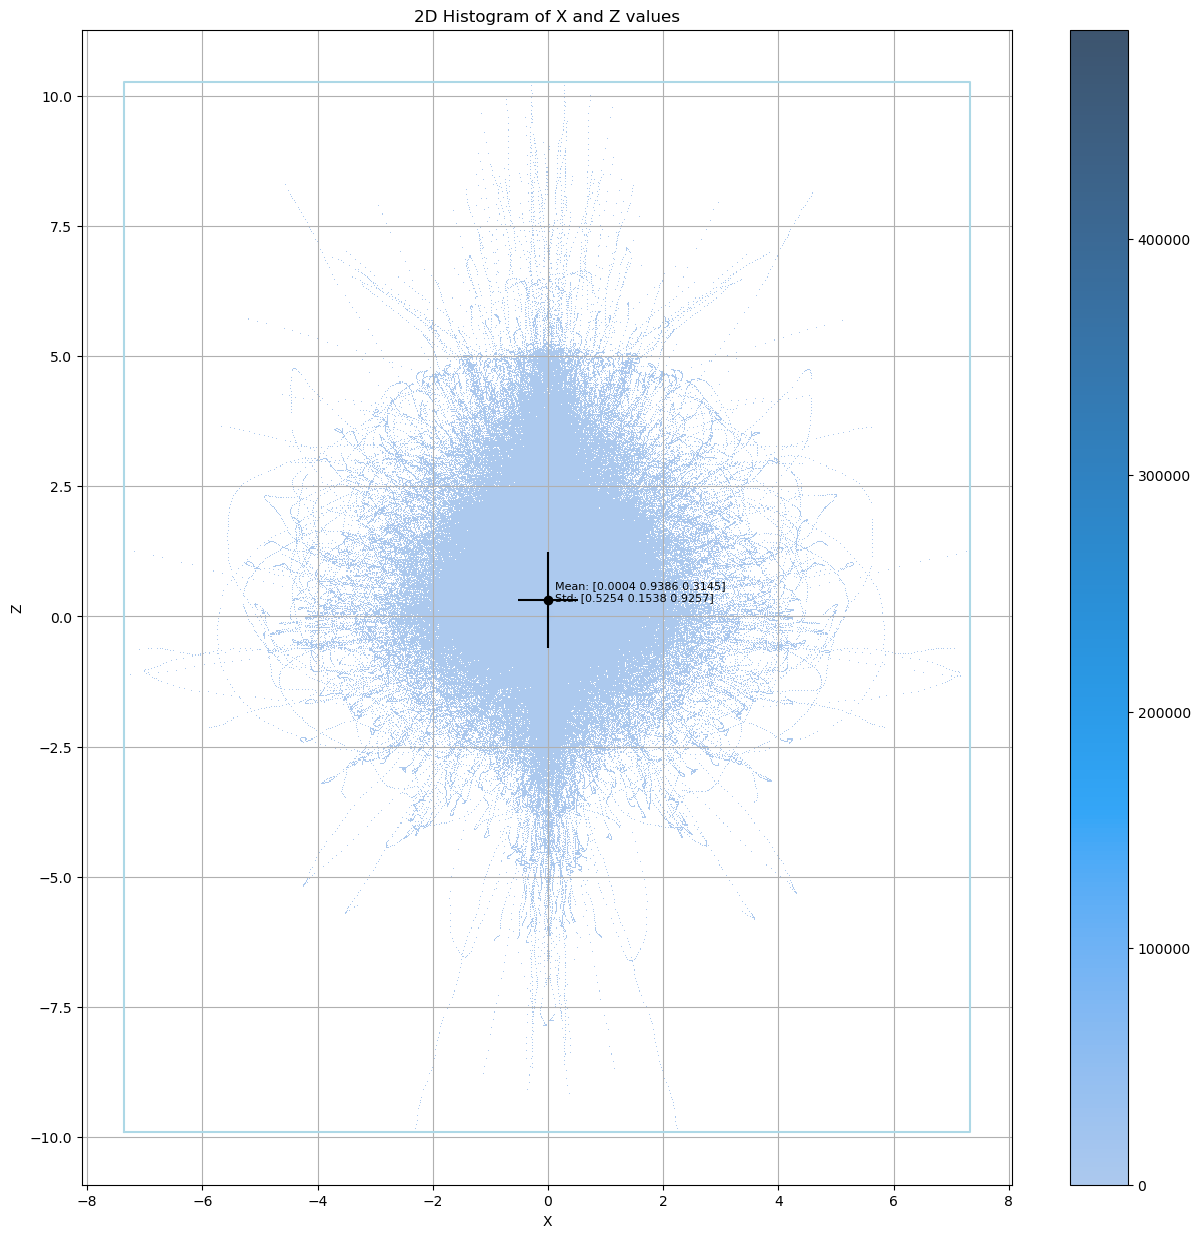

In [11]:
# 2D Histogram of X and Z values
plt.figure(figsize=(15, 15))

plt.title("2D Histogram of X and Z values")
sns.histplot(x=root_positions_np[:, 0], y=root_positions_np[:, 2], bins=1_000, stat="count", cbar=True)
plt.xlabel("X")
plt.ylabel("Z")

# # Visualize the 25th, 50th, 75th and 95th percentiles
# ps = [25, 50, 75, 95]
# percentiles = np.percentile(root_positions_np, ps, axis=0)
# for p, percentile in zip(ps, percentiles):
#     plt.scatter(percentile[0], percentile[2], color="red", marker="x", s=100)
#     plt.text(percentile[0], percentile[2], f"  {p} Percentile: {percentile}", fontsize=8)

# Visualize the mean and std with error bars
mean = np.mean(root_positions_np, axis=0)
std = np.std(root_positions_np, axis=0)
plt.errorbar(mean[0], mean[2], xerr=std[0], yerr=std[2], fmt="o", color="black", label="Mean and Std")
plt.text(mean[0], mean[2], f"  Mean: {mean}\n  Std: {std}", fontsize=8)

# Draw a bounding box around the min and max values
min_values = np.min(root_positions_np, axis=0)
max_values = np.max(root_positions_np, axis=0)
plt.plot([min_values[0], max_values[0], max_values[0], min_values[0], min_values[0]],
         [min_values[2], min_values[2], max_values[2], max_values[2], min_values[2]],
         color="lightblue", label="Bounding Box")

plt.grid()
plt.show()

<Axes: title={'center': '2D Histogram of X and Z values'}>

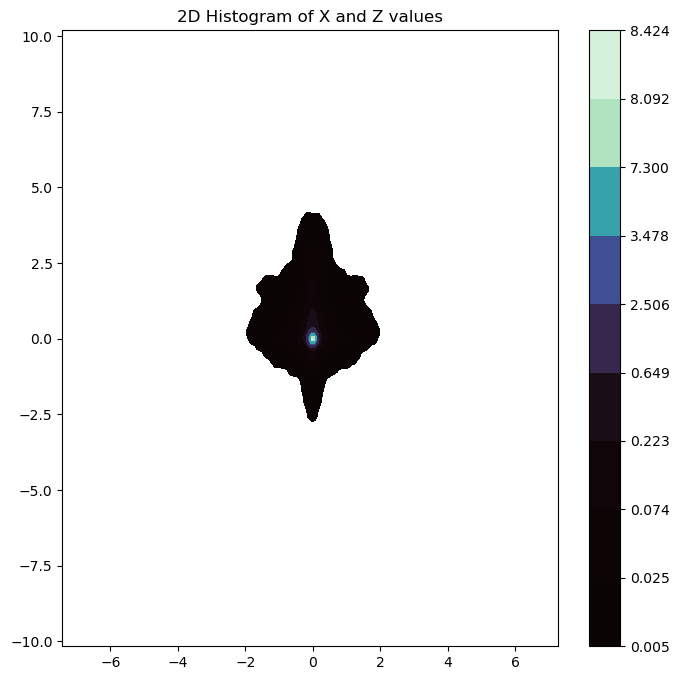

In [18]:
# 2D Histogram of X and Z values
plt.figure(figsize=(8, 8))
plt.title("2D Histogram of X and Z values")
# sns.kdeplot(x=root_positions_np[::10, 0], y=root_positions_np[::10, 2],levels=10, fill=True, cmap="mako", cbar=True, norm=colors.LogNorm())
sns.kdeplot(x=root_positions_np[::10, 0], y=root_positions_np[::10, 2], levels=10, fill=True, cmap="mako", cbar=True)



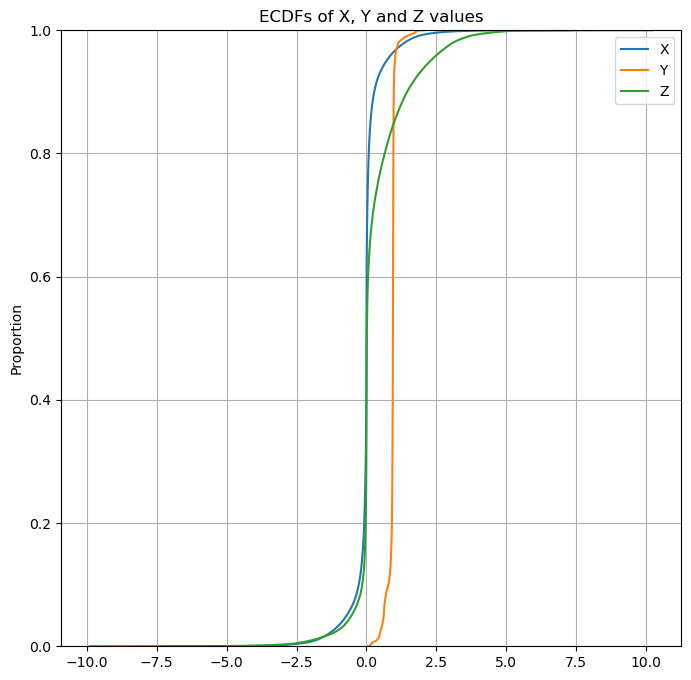

In [8]:
# Plot all ECDFs in one subplot
plt.figure(figsize=(8, 8))
plt.title("ECDFs of X, Y and Z values")
plt.grid()
sns.ecdfplot(root_positions_np[:, 0], label="X")
sns.ecdfplot(root_positions_np[:, 1], label="Y")
sns.ecdfplot(root_positions_np[:, 2], label="Z")
plt.legend()
plt.show()

<Axes: title={'center': 'Y values'}, ylabel='Count'>

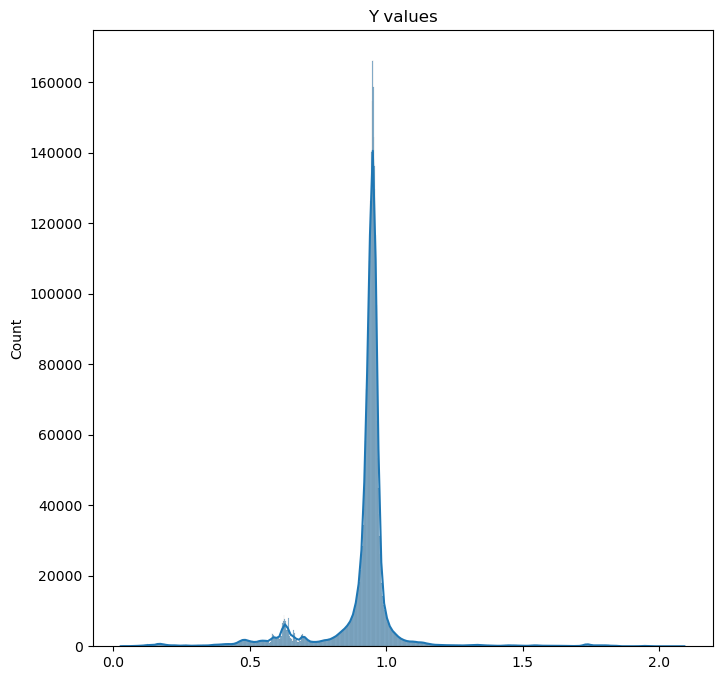

In [9]:
# Histogram of Y values
plt.figure(figsize=(8, 8))
plt.title("Y values")
sns.histplot(root_positions_np[:, 1], kde=True, stat="count", bins=1_000)


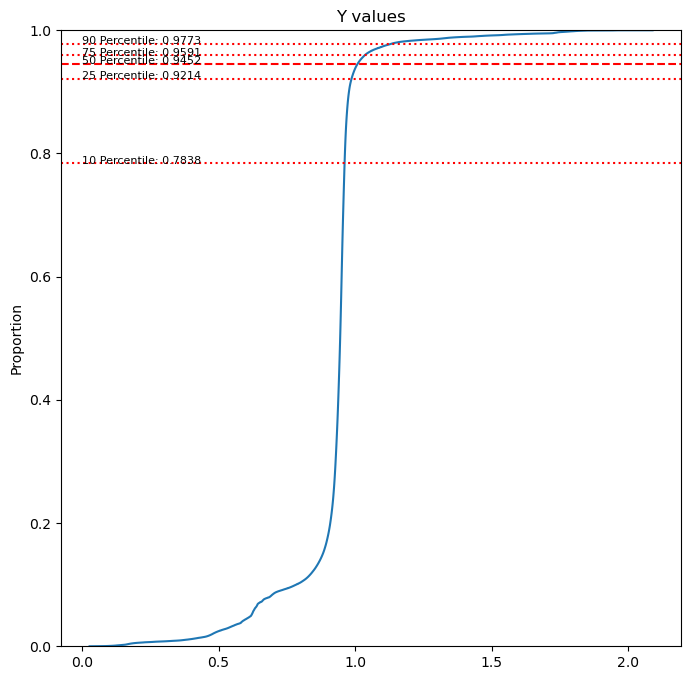

In [14]:
# Histogram of Y values
plt.figure(figsize=(8, 8))

plt.title("Y values")
sns.ecdfplot(root_positions_np[:, 1])

# draw percentile lines
percentiles = [10, 25, 50, 75, 90]
styles = [":", ":", "--", ":", ":"]
percentile_values = np.percentile(root_positions_np[:, 1], percentiles)
for p, pv, ps in zip(percentiles, percentile_values, styles):
    plt.axhline(y=pv, color="red", linestyle=ps)
    plt.text(0, pv, f"{p} Percentile: {pv:.04f}", fontsize=8)